## Clustering algo

parition based - e.g kmeans (centrod based )

density based - DBSCAN

Hierarchial - Agglomerative/Divisive

Model based - Gaussian mixture models

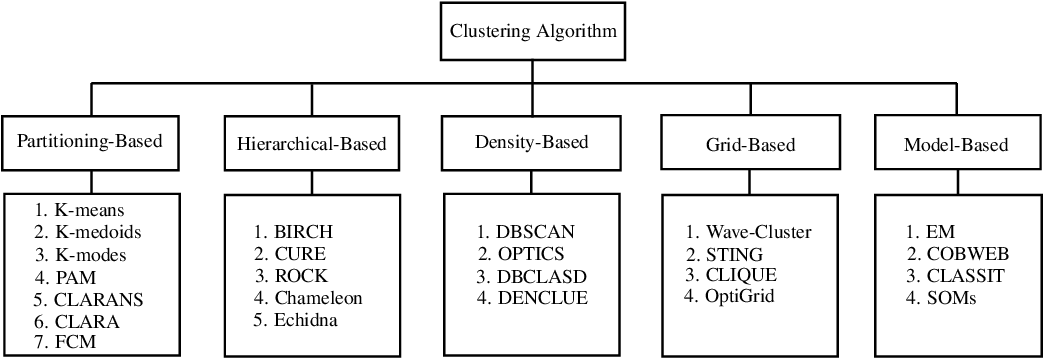

### Hierarchial - Agglomerative/Divisive

Agglomerative -> merging

Divisive -> split

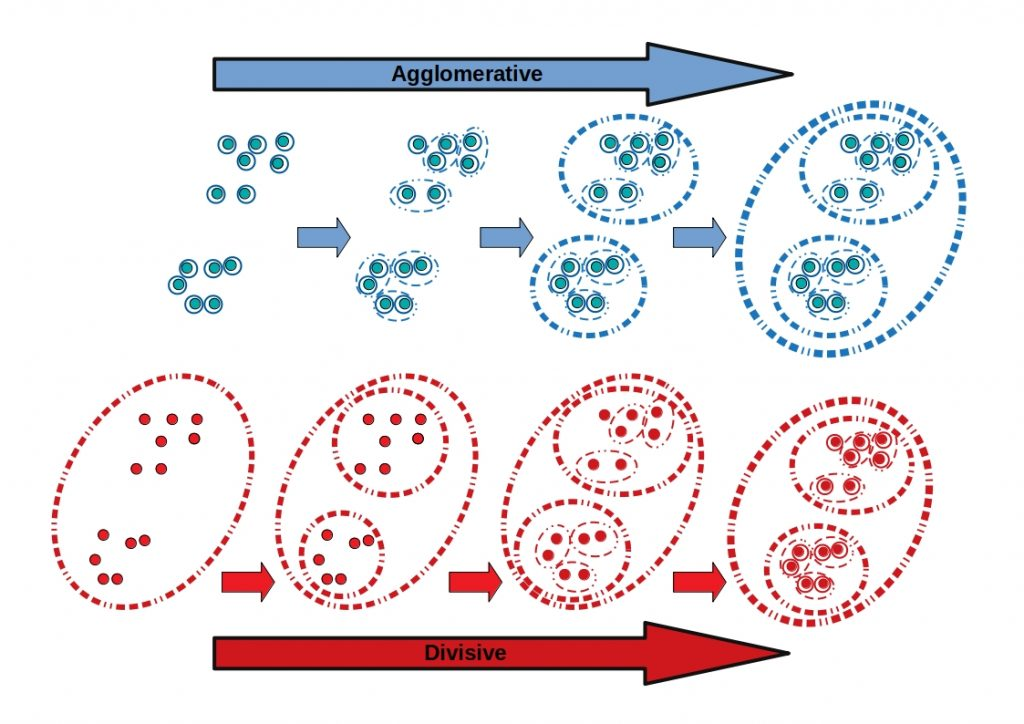

###### Agglomerative uses affinity matrix based on euclidian distance measure

https://www.geeksforgeeks.org/ml-types-of-linkages-in-clustering/

###### Affinity matrix is a symmetric matrix

1. calculate affinity matrix

2. Based on the values in the affinity matrix cluster will be formed. Form the cluster based on the lowest value in the affinity matrix. 

3. Linkage is used to select one of the two values . linkage can be complete(max), avg, single(min) or ward(minimise the variance of the clusters being merged). Ward is the best method

4. Form the affinity matrix again

5. Repear the process 2,3,4 till the one cluster is formed

6. Form the dendrogram using the sample cluster and distance 

7. Based on the distance(affinity measure), we can get the clusters


Affinity can be found by Euclidian, Manhatten and Cosine

In [3]:
# Import the libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# access the dataset

cust = pd.read_csv('wholesale_customers.csv')

In [6]:
cust

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
cust.shape

(440, 8)

In [9]:
## standardisation of features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X= sc.fit_transform(cust)
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [13]:
print(cust.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [14]:
## Converting to dataframe

X = pd.DataFrame(X , columns=cust.columns)
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


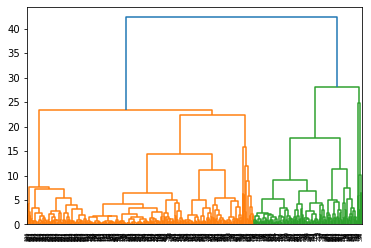

In [21]:
## Drawing dendogram using scipy

from scipy.cluster.hierarchy import dendrogram, linkage

dendro = dendrogram(linkage(X, method='ward'))  


# import scipy.cluster.hierarchy as sch

# denro = sch.dendrogram(sch.linkage(X, method='ward'))

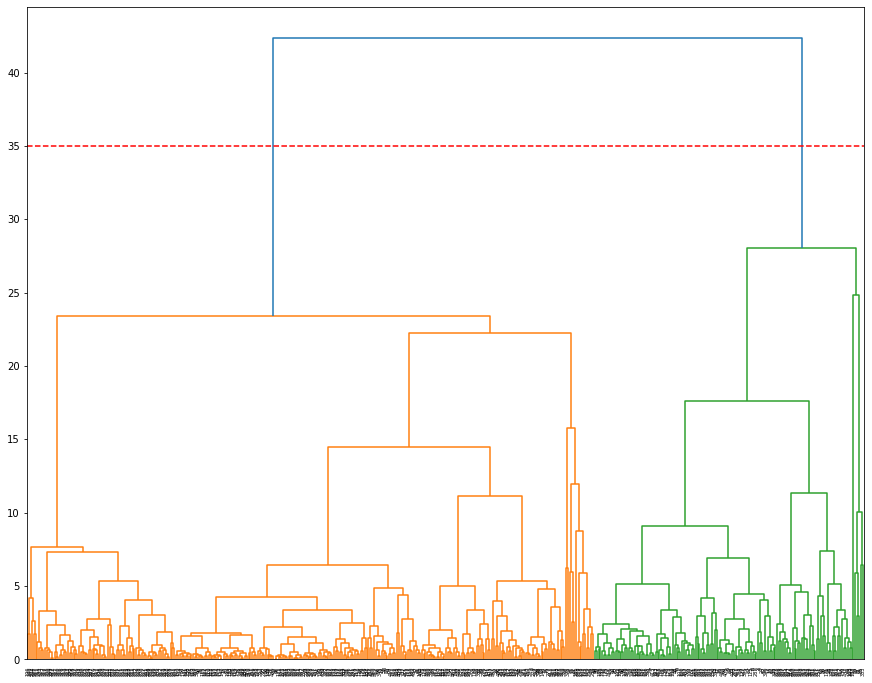

In [23]:
# Visualising the dendogram with the axis line

plt.figure(figsize=(15,12))
dendro = dendrogram(linkage(X, method='ward')) 
plt.axhline(y=35, c='red', linestyle="--")

# Based on the y axis we can form the cluster. Higher the value less clusters and lower the value more clusters

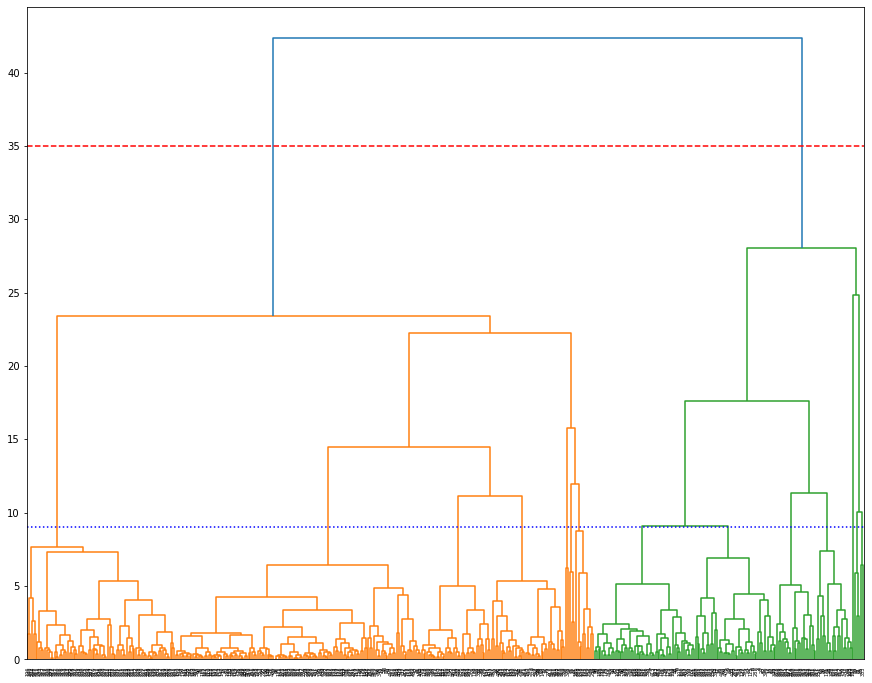

In [29]:
# Visualising the dendogram with the different axis line

plt.figure(figsize=(15,12))
dendro = dendrogram(linkage(X, method='ward')) 
plt.axhline(y=35, c='red', linestyle="--")
plt.axhline(y=9, c='blue', linestyle=":")

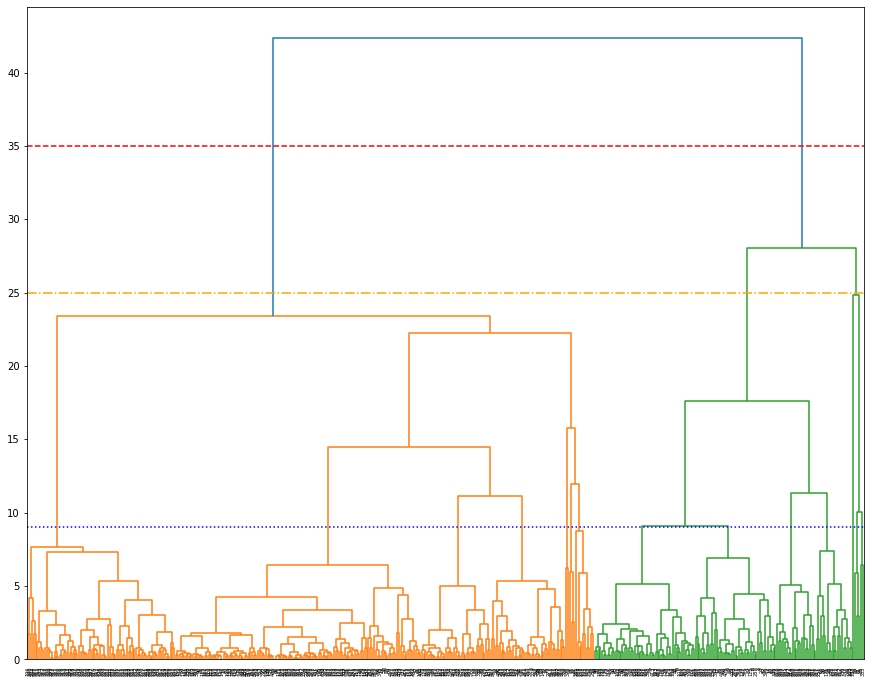

In [30]:
# Visualising the dendogram with the different axis line

plt.figure(figsize=(15,12))
dendro = dendrogram(linkage(X, method='ward')) 
plt.axhline(y=35, c='red', linestyle="--")
plt.axhline(y=9, c='blue', linestyle=":")
plt.axhline(y=25, c='orange', linestyle="-.")

In [54]:
## agglomerative clustering using sklearn

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)  ## 3 clusers and with linkage ward

In [55]:
clustering.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [56]:
clustering.fit_predict(X)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [57]:
## adding labels to the DF

X['Label'] =clustering.labels_ # or =pd.Series(clustering.labels_)
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


In [58]:
### Anaysing the no of customer in each segments

X['Label'].value_counts()

1    298
0    142
Name: Label, dtype: int64

In [59]:
### List all the customer belongs to segment 0

X[X['Label']==0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
5,1.448652,0.590668,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,0
...,...,...,...,...,...,...,...,...,...
418,1.448652,0.590668,-0.897676,0.365944,1.124138,-0.606071,0.810196,-0.265849,0
421,1.448652,0.590668,0.400754,-0.128767,0.116064,-0.420884,0.112024,0.091991,0
423,1.448652,0.590668,0.440491,-0.286255,-0.347045,-0.415110,-0.226458,-0.304189,0
424,1.448652,0.590668,0.394184,-0.395045,0.450965,-0.453261,0.069609,-0.452934,0


In [60]:
X.query('Label == 0')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
5,1.448652,0.590668,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,0
...,...,...,...,...,...,...,...,...,...
418,1.448652,0.590668,-0.897676,0.365944,1.124138,-0.606071,0.810196,-0.265849,0
421,1.448652,0.590668,0.400754,-0.128767,0.116064,-0.420884,0.112024,0.091991,0
423,1.448652,0.590668,0.440491,-0.286255,-0.347045,-0.415110,-0.226458,-0.304189,0
424,1.448652,0.590668,0.394184,-0.395045,0.450965,-0.453261,0.069609,-0.452934,0


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

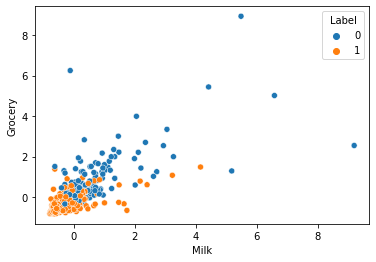

In [61]:
## buying patter to milk and grocery

sns.scatterplot(x=X['Milk'], y=X['Grocery'], hue=X['Label'])

<Figure size 1080x864 with 0 Axes>

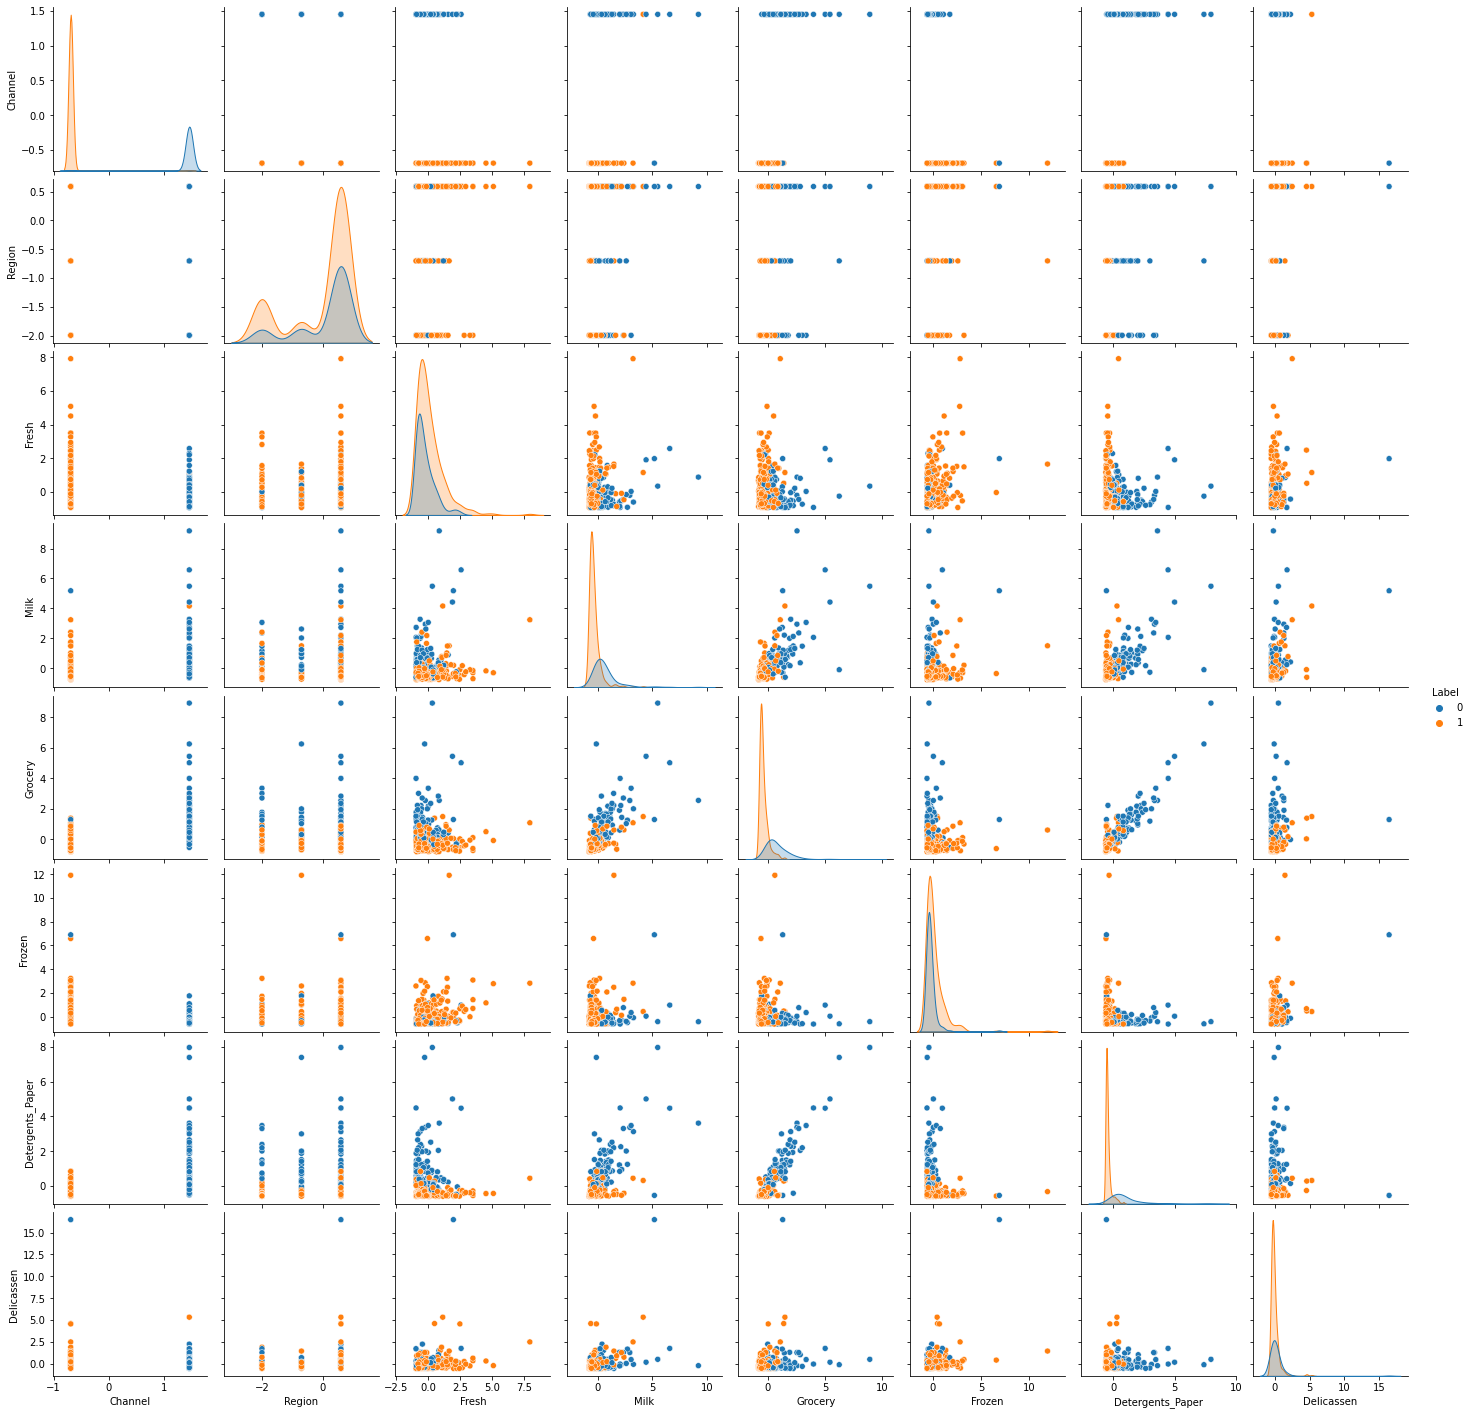

In [62]:
plt.figure(figsize=(15,12))
sns.pairplot(data=X, hue='Label')